# NGC 346 and B 90 CMDs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [2]:
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/Catalogs/catalog.xym'
data = pd.read_csv(input_file, sep='\t')

mag_limit = -5. 
data_spatial = data[(data['F814W'] < mag_limit) & (data['F555W'] < mag_limit)]
print(data)
print(data_spatial)

             x        y   F814W   F225W   F275W   F336W   F475W    F555W
0      5894.85  1143.01 -10.457 -6.3218 -6.2434 -7.0835 -9.8819 -10.1313
1      5787.07  1148.84  -7.412     NaN     NaN     NaN     NaN  -5.5141
2      5823.93  1157.60  -8.794     NaN     NaN     NaN -7.7546  -8.1857
3      5832.33  1157.62  -9.674     NaN -5.3449 -6.1193 -8.8504  -9.2376
4      5678.37  1164.50  -7.632     NaN     NaN     NaN -6.0920  -6.2844
...        ...      ...     ...     ...     ...     ...     ...      ...
95408  8905.37  8929.01 -10.120     NaN     NaN     NaN     NaN  -9.7397
95409  8825.94  8930.33  -7.115     NaN     NaN     NaN     NaN  -6.0388
95410  8816.49  8931.44  -8.155     NaN     NaN     NaN     NaN  -7.3086
95411  8995.33  8931.32  -7.360     NaN     NaN     NaN     NaN  -6.4984
95412  9016.47  8935.28  -9.973     NaN     NaN     NaN     NaN  -9.4902

[95413 rows x 8 columns]
             x        y   F814W   F225W   F275W   F336W   F475W    F555W
0      5894.85  1143.01 -

## Selection of the two targets

In [3]:
# Plot the spatial distribution and the selected old cluster (B 90) and young one (NGC 346)

# center and approximative radius of the young cluster 
center_NGC346 = np.array([4850,4920])
radius_NGC346 = 750

# center and approximative radius of the old cluster
center_B90 = np.array([5000, 7000])
radius_B90 = 1000

# center and approximative radius of the reference field
center_reference = np.array([2200, 3000])
radius_reference = 1000

# compute the distance and select the stars in the two clusters
data['distance_NGC346'] = np.sqrt((data['x'] - center_NGC346[0]) ** 2 + (data['y'] - center_NGC346[1]) ** 2)
data['distance_B90'] = np.sqrt((data['x'] - center_B90[0]) ** 2 + (data['y'] - center_B90[1]) ** 2)
data['distance_reference'] = np.sqrt((data['x'] - center_reference[0]) ** 2 + (data['y'] - center_reference[1]) ** 2)

data_NGC346_cluster = data[data['distance_NGC346'] < radius_NGC346]
data_B90_cluster = data[data['distance_B90'] < radius_B90]
data_reference_field = data[data['distance_reference'] < radius_reference]

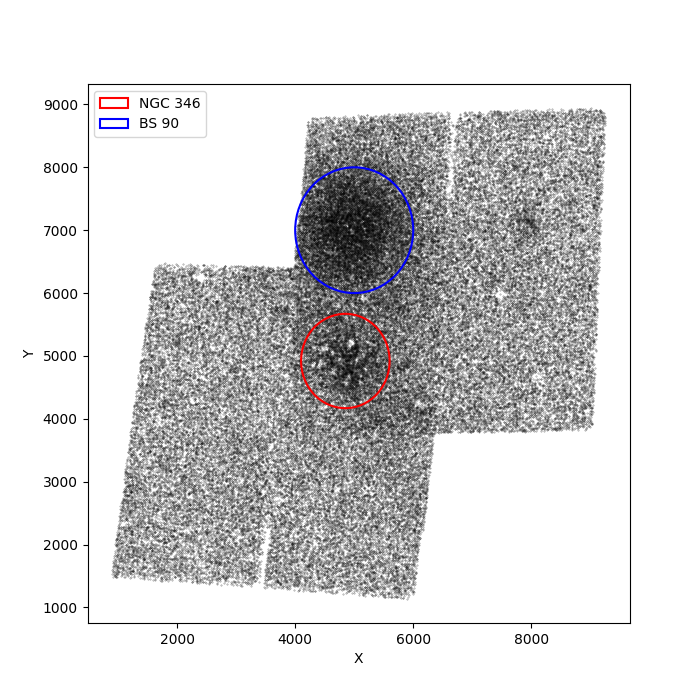

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/spatial_distribution.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [4]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(data_spatial['x'], data_spatial['y'], s=0.1, alpha=0.5, c='black') #c=data_spatial['F814W'], cmap = 'magma_r')
circle_NGC346 = plt.Circle(center_NGC346, radius_NGC346, color='red', fill=False, linestyle='-', linewidth=1.5, label=r'NGC 346')
ax.add_patch(circle_NGC346)
circle_B90 = plt.Circle(center_B90, radius_B90, color='blue', fill=False, linestyle='-', linewidth=1.5, label=r'BS 90')
ax.add_patch(circle_B90)
#cbar = plt.colorbar()
#cbar.set_label('Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/spatial_distribution.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

## Color-Magnitude Diagrams
### CMD with the widest baseline possible

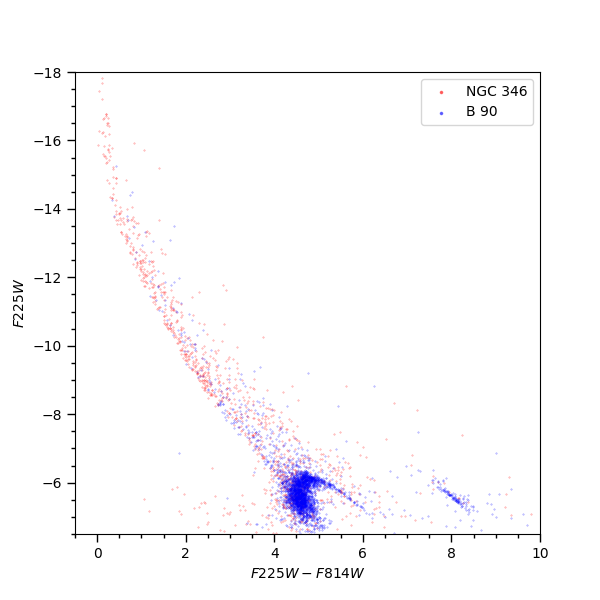

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F225W_F814W.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [22]:
# CMD with wide baseline
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data_NGC346_cluster['F225W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F225W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F225W']-data_B90_cluster['F814W'], data_B90_cluster['F225W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-0.5,10)
plt.ylim(-4.5,-18)
plt.xlabel(r'$F225W-F814W$')
plt.ylabel(r'$F225W$')
plt.legend(markerscale=5)
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F225W_F814W.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

### Some optical CMDs

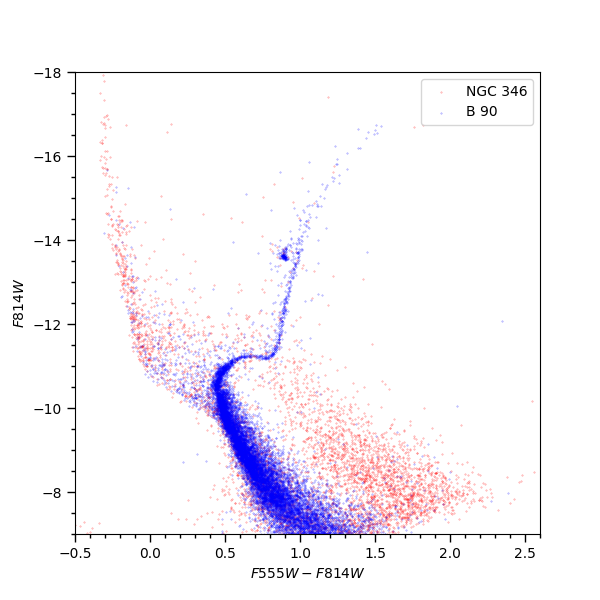

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F555W_F814W.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [23]:
# Optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data_NGC346_cluster['F555W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F814W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F555W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-0.5,2.6)
plt.ylim(-7, -18)
plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F555W_F814W.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

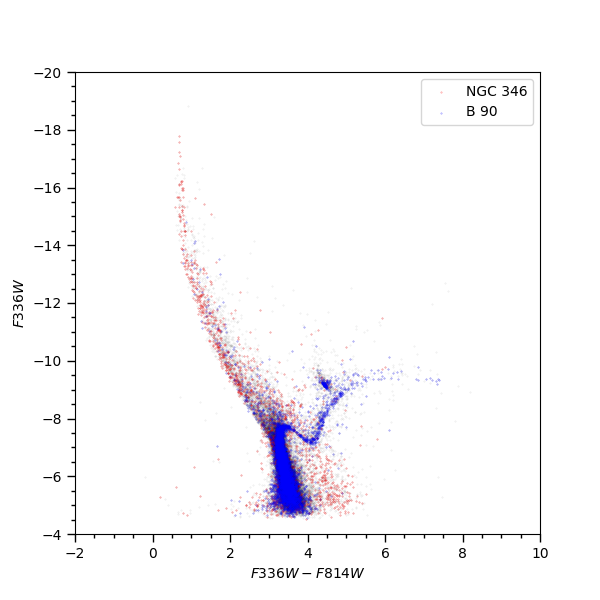

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F336W_F814W.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [7]:
# Another optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data['F336W']-data['F814W'], data['F336W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F336W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F336W']-data_B90_cluster['F814W'], data_B90_cluster['F336W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-2, 10)
plt.ylim(-4, -20)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F336W$')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F336W_F814W.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

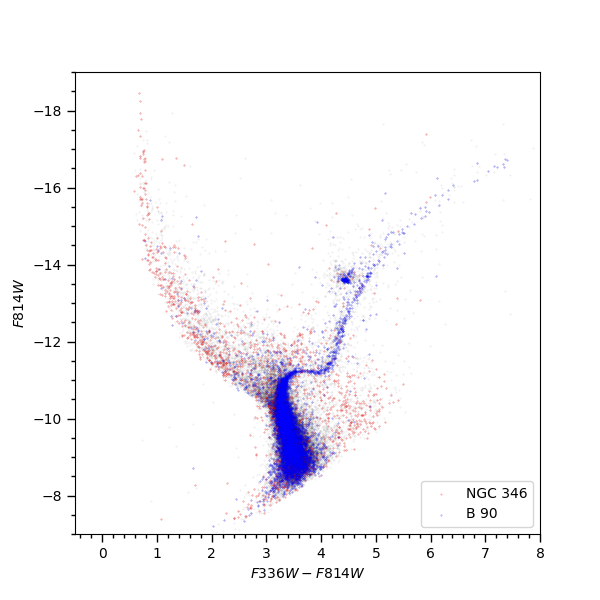

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F336W_F814W.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [8]:
# Another optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data['F336W']-data['F814W'], data['F814W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F814W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F336W']-data_B90_cluster['F814W'], data_B90_cluster['F814W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-0.5, 8)
plt.ylim(-7, -19)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F336W_F814W.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

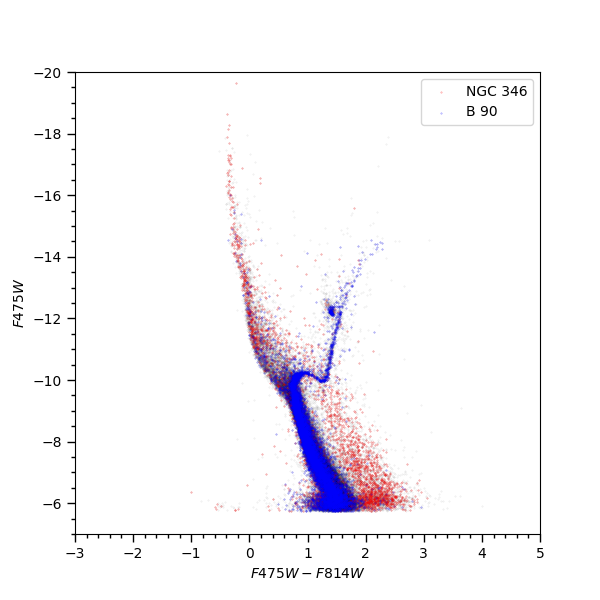

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F475W_F814W.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [9]:
# Another optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data['F475W']-data['F814W'], data['F475W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_NGC346_cluster['F475W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F475W'], s=0.1, alpha=0.5, c='red', label=r'NGC 346')
plt.scatter(data_B90_cluster['F475W']-data_B90_cluster['F814W'], data_B90_cluster['F475W'], s=0.1, alpha=0.5, c='blue', label=r'B 90')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-3, 5)
plt.ylim(-5, -20)
plt.xlabel(r'$F475W-F814W$')
plt.ylabel(r'$F475W$')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/F475W_F814W.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

## Presence of multipopulations
### B 90

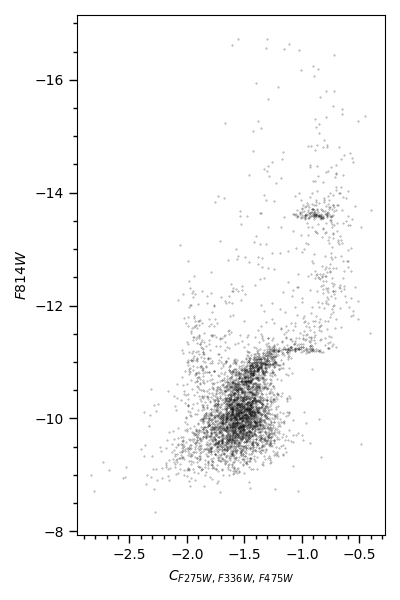

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/multipop_pseudocolor.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [10]:
data_multipop = data_B90_cluster #[(data_B90_cluster['F275W'] < -3) & (data_B90_cluster['F336W'] < -3) & (data_B90_cluster['F475W'] < -3) & (data_B90_cluster['F814W'] < -3)]
pseudo_color = data_multipop['F275W']-2*data_multipop['F336W']+data_multipop['F475W']

fig, ax = plt.subplots(figsize=(4,6))
plt.scatter(pseudo_color, data_multipop['F814W'], s=0.1, alpha=0.5, c='black')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
#plt.xlim(-3,0)
#plt.ylim(-8,-17)
plt.xlabel(r'$C_{F275W,\,F336W,\,F475W}$')
plt.ylabel(r'$F814W$')

plt.tight_layout()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/multipop_pseudocolor.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''


### CMD of the reference field

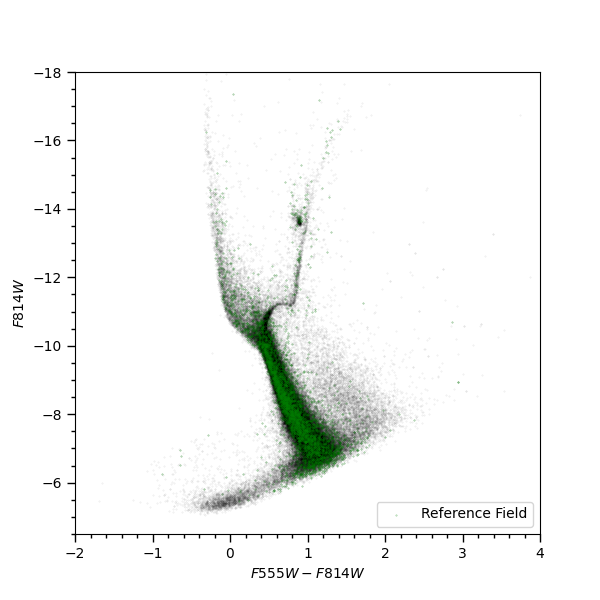

In [11]:
# Optical CMD
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(data['F555W']-data['F814W'], data['F814W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_reference_field['F555W']-data_reference_field['F814W'], data_reference_field['F814W'], s=0.1, alpha=0.5, c='green', label=r'Reference Field')

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlim(-2,4)
plt.ylim(-4.5, -18)
plt.xlabel(r'$F555W-F814W$')
plt.ylabel(r'$F814W$')
plt.legend()
plt.show()

### UV CMD for detection of UV-dim stars

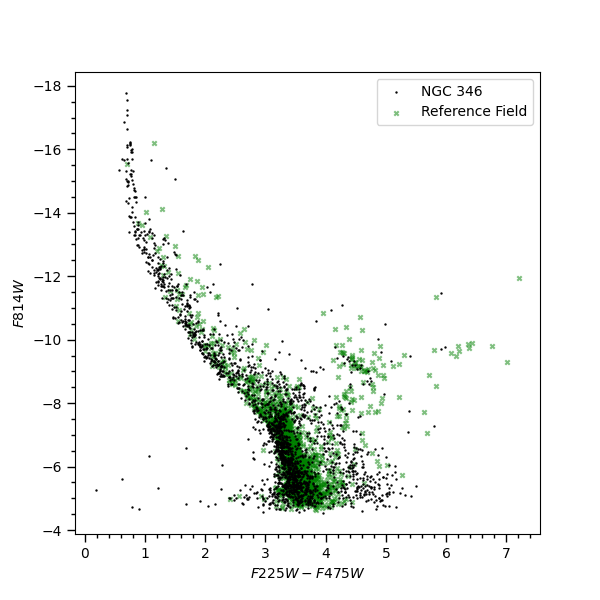

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/uv_dim_CMD.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [12]:
# UV-dim detection 
fig, ax = plt.subplots(figsize=(6, 6))
#plt.scatter(data['F225W']-data['F475W'], data['F814W'], s=0.1, alpha=0.1, c='black')
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F336W'], s=0.5, c='black', label=r'NGC 346', zorder=2)
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F336W'], s=10, alpha = 0.5, c='green', marker='x', label=r'Reference Field', zorder=1)

ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)

plt.gca().invert_yaxis()
plt.xlabel(r'$F225W-F475W$')
plt.ylabel(r'$F814W$')
plt.legend()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/uv_dim_CMD.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

### Two colors diagram for UV-dim

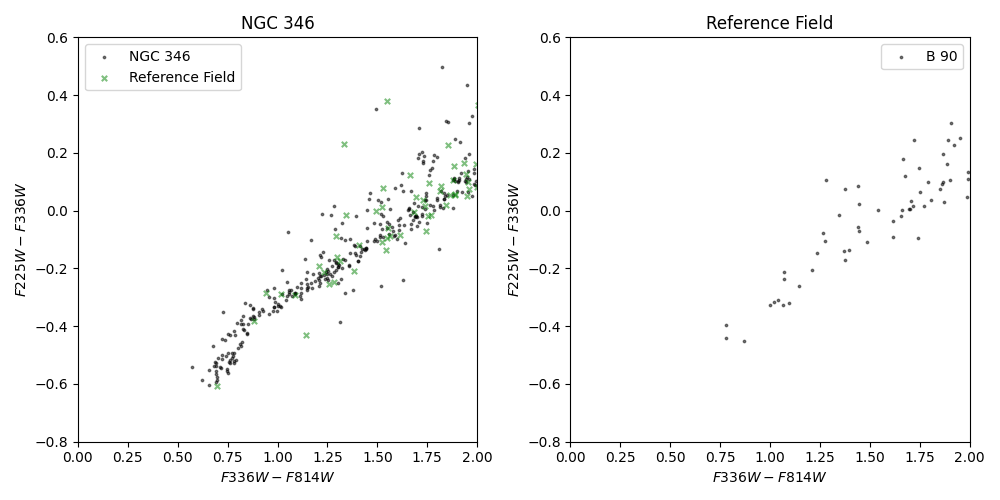

"\n# save the plot \noutput_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/two_color_uvdim.pdf' \nfig.savefig(output_file, format='pdf', bbox_inches='tight')\n"

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(data_NGC346_cluster['F336W']-data_NGC346_cluster['F814W'], data_NGC346_cluster['F225W']-data_NGC346_cluster['F336W'], s=3, alpha=0.5, c='black', label='NGC 346')
plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.5, marker='x', c='green', label=r'Reference Field')
plt.xlim(0, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend()
plt.title('NGC 346')

plt.subplot(1,2,2)
#plt.scatter(data_reference_field['F336W']-data_reference_field['F814W'], data_reference_field['F225W']-data_reference_field['F336W'], s=15, alpha=0.5, marker='x', c='green', label=r'Reference Field')
plt.scatter(data_B90_cluster['F336W']-data_B90_cluster['F814W'], data_B90_cluster['F225W']-data_B90_cluster['F336W'], s=3, alpha=0.5, c='black', label='B 90')
plt.xlim(0, 2)
plt.ylim(-0.8, 0.6)
plt.xlabel(r'$F336W-F814W$')
plt.ylabel(r'$F225W-F336W$')
plt.legend()
plt.title('Reference Field')

plt.tight_layout()
plt.show()

'''
# save the plot 
output_file = '/Users/giadaaggio/Desktop/Thesis/CMDs/two_color_uvdim.pdf' 
fig.savefig(output_file, format='pdf', bbox_inches='tight')
'''

## Colored image